Aim :Performing ARIMA model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,7

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Covid 19 Confirmed Cases-Kerala.csv')

In [ ]:
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)

# set Date column as index
df = df.set_index('Date')

In [ ]:
# first five rows of dataframe
df.head()


,Confirmed
Date,
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0
2020-02-04,0.0


In [ ]:
# last 5 rows of dataframe
df.tail()

,Confirmed
Date,
2021-07-24,18531.0
2021-07-25,17466.0
2021-07-26,11586.0
2021-07-27,22129.0
2021-07-28,22056.0


In [ ]:
# column names
df.columns

Index(['Confirmed'], dtype='object')

In [ ]:
# shape of the dataframe
df.shape

(545, 1)

In [ ]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545 entries, 2020-01-31 to 2021-07-28
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


In [ ]:
# checking for null values
df.isnull().sum()

Confirmed    0
dtype: int64

In [ ]:
# descriptive statistics of data
df.describe()

,Confirmed
count,545.000000
mean,6105.119266
std,8534.263954
min,0.000000
25%,97.000000
50%,3272.000000
75%,7002.000000
max,43529.000000


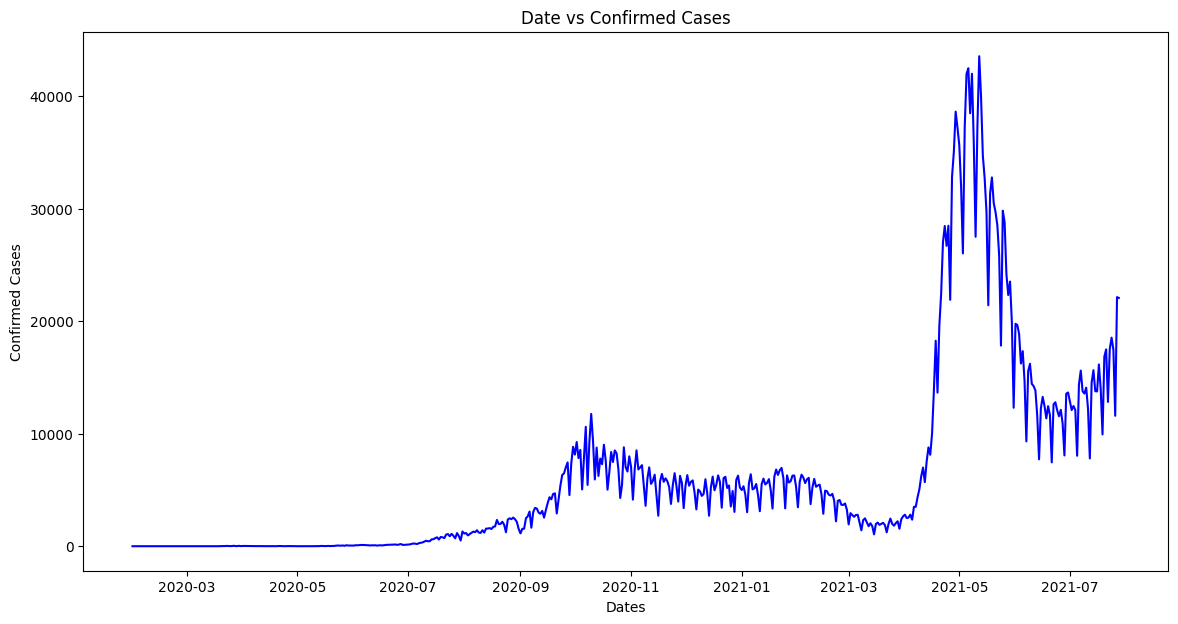

In [ ]:
# plot graph

plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Date vs Confirmed Cases')
plt.plot(df, color='b')

In [ ]:
# rolling mean
rolmean = df.rolling(window=3).mean()
rolmean.head()

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.333333
2020-02-03,0.666667
2020-02-04,0.666667


In [ ]:
# rolling standard deviation
rolstd = df.rolling(window=3).std()
rolstd.head()

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.57735
2020-02-03,0.57735
2020-02-04,0.57735


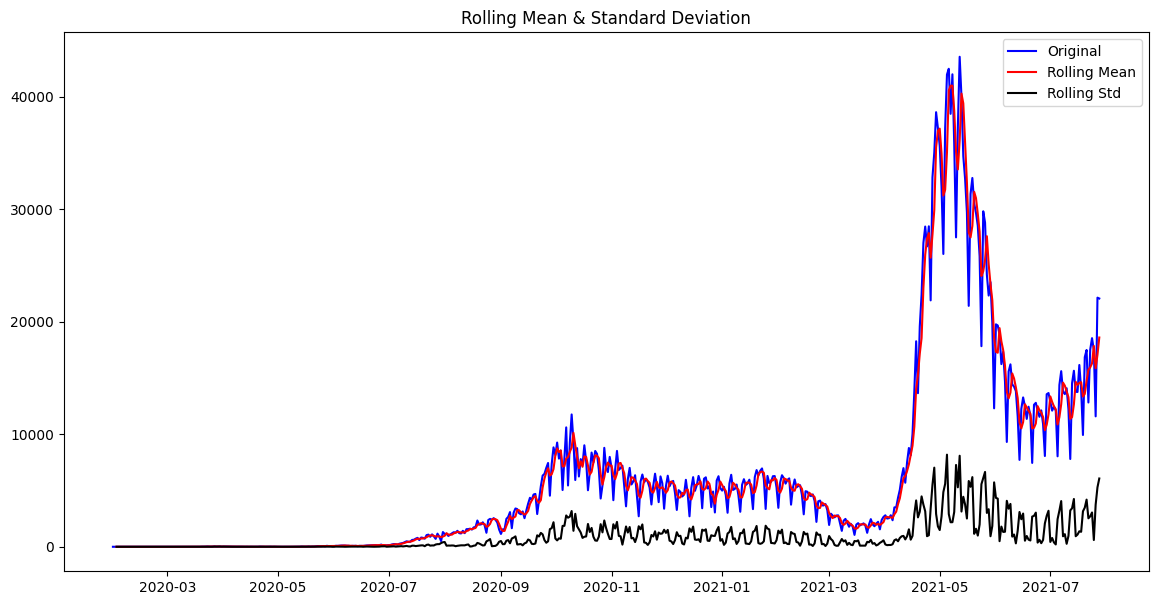

In [ ]:
# plotting rolling statistics
org = plt.plot(df, color='b', label='Original')
mean = plt.plot(rolmean, color='r', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df.Confirmed, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic               -2.646869
p value                       0.083692
#Lags used                   17.000000
No:of observations found    527.000000
Critical Value (1%)          -3.442820
Critical Value (5%)          -2.867040
Critical Value (10%)         -2.569699
dtype: float64


In [ ]:
# Wrapping visual and statistical tools in a single function

def test_stationarity(timeseries):

    # Determining rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    # Plot rolling statistics
    org = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rolmean, color='r', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries.Confirmed, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

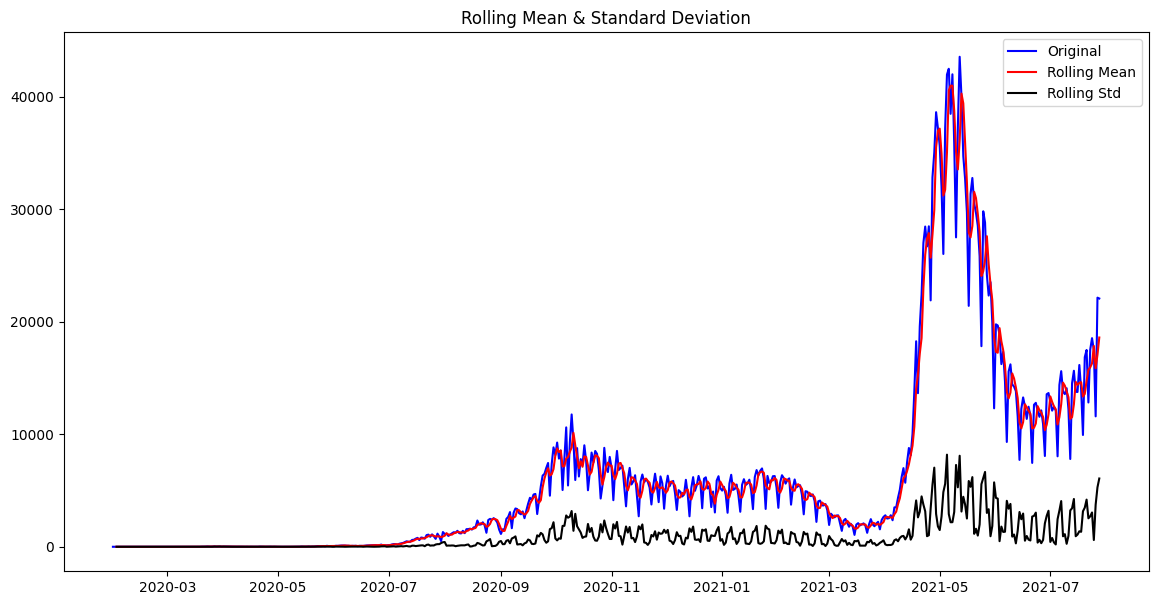

Results of Dickey-Fuller Test
Test Statistic               -2.646869
p value                       0.083692
#Lags used                   17.000000
No:of observations found    527.000000
Critical Value (1%)          -3.442820
Critical Value (5%)          -2.867040
Critical Value (10%)         -2.569699
dtype: float64


In [ ]:
test_stationarity(df)

In [ ]:
movingAverage = df.rolling(window=3).mean()
df_minus_movingAverage = df - movingAverage
df_minus_movingAverage.head(7)

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.666667
2020-02-03,0.333333
2020-02-04,-0.666667
2020-02-05,-0.333333
2020-02-06,0.000000


In [ ]:
# dropping nan values
df_minus_movingAverage.dropna(inplace=True)
df_minus_movingAverage.head()

,Confirmed
Date,
2020-02-02,0.666667
2020-02-03,0.333333
2020-02-04,-0.666667
2020-02-05,-0.333333
2020-02-06,0.000000


In [ ]:
# dropping nan values
movingAverage.dropna(inplace=True)
movingAverage

,Confirmed
Date,
2020-02-02,0.333333
2020-02-03,0.666667
2020-02-04,0.666667
2020-02-05,0.333333
2020-02-06,0.000000
...,...
2021-07-24,16289.000000
2021-07-25,17838.333333
2021-07-26,15861.000000


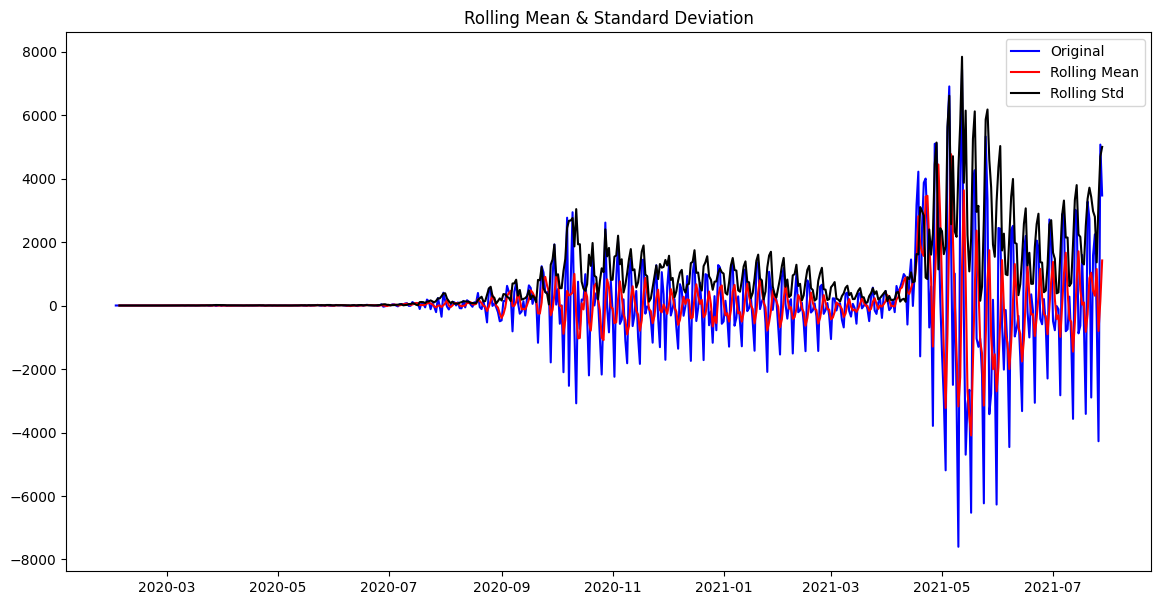

Results of Dickey-Fuller Test
Test Statistic               -4.833783
p value                       0.000047
#Lags used                   19.000000
No:of observations found    523.000000
Critical Value (1%)          -3.442915
Critical Value (5%)          -2.867082
Critical Value (10%)         -2.569722
dtype: float64


In [ ]:
test_stationarity(df_minus_movingAverage)

In [ ]:
#checking lags

from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(df_minus_movingAverage)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':              0            1            2
 0  9458.750250  9436.042797  9342.509633
 1  9458.919126  9373.099893  9344.063136
 2  9365.011725  9358.157852  9216.737041
 3  9360.889329  9363.767099  9369.247344
 4  9347.176470  9342.256723  9155.484205,
 'bic_min_order': (4, 2)}

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
print('Plotting ARIMA Model')


Plotting ARIMA Model


In [ ]:
df_minus_movingAverage.index.freq = 'D'



In [ ]:
import warnings
warnings.filterwarnings("ignore")


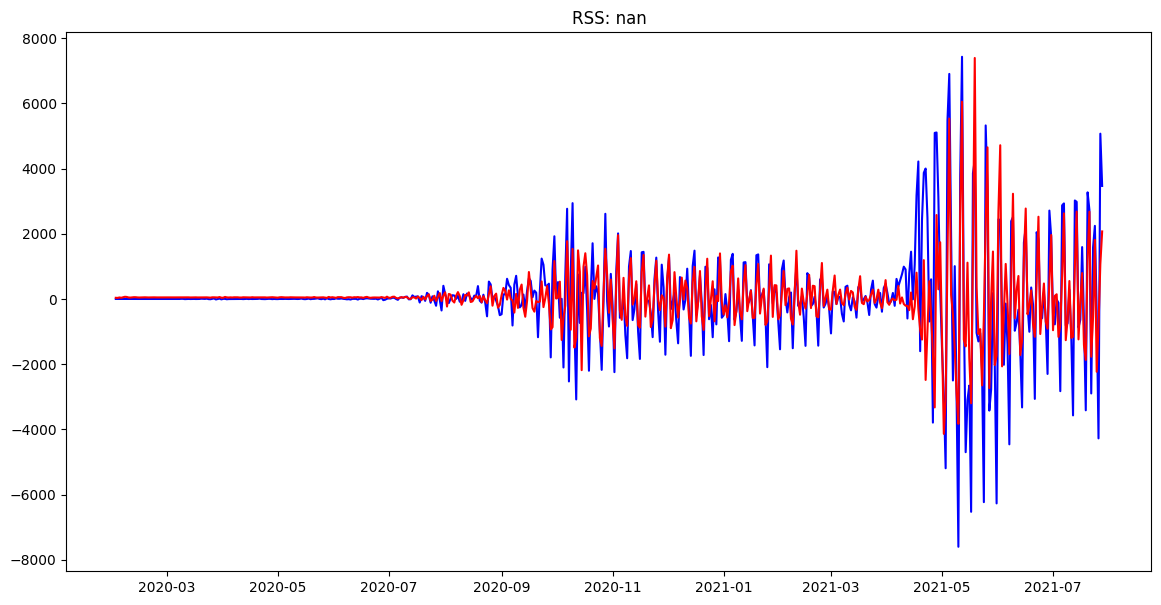

In [ ]:

from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df_minus_movingAverage, order=(4, 0, 2))

# Fit the ARIMA model
results_ARIMA = model.fit()

# Plot the original time series and fitted values
plt.plot(df_minus_movingAverage, color='b')
plt.plot(results_ARIMA.fittedvalues, color='r')
plt.title('RSS: {:1.4f}'.format(sum((results_ARIMA.fittedvalues - df['Confirmed']) ** 2)))
plt.show()



In [ ]:
# to pandas series
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
pred_ARIMA_diff

Date
2020-02-02      35.741741
2020-02-03      32.730958
2020-02-04      46.384572
2020-02-05      37.015671
2020-02-06      51.454412
                 ...     
2021-07-24    1811.857036
2021-07-25   -2231.562335
2021-07-26    -825.307801
2021-07-27    1069.794769
2021-07-28    2071.221731
Freq: D, Length: 543, dtype: float64

In [ ]:
#to dataframe

pred_ARIMA = pred_ARIMA_diff.to_frame()
pred_ARIMA.tail()

,0
Date,
2021-07-24,1811.857036
2021-07-25,-2231.562335
2021-07-26,-825.307801
2021-07-27,1069.794769
2021-07-28,2071.221731


In [ ]:
# converting back to orginal by adding moving averages

model_values = pred_ARIMA[0] + movingAverage['Confirmed']
model_values.tail()

Date
2021-07-24    18100.857036
2021-07-25    15606.770998
2021-07-26    15035.692199
2021-07-27    18130.128102
2021-07-28    20661.555065
Freq: D, dtype: float64

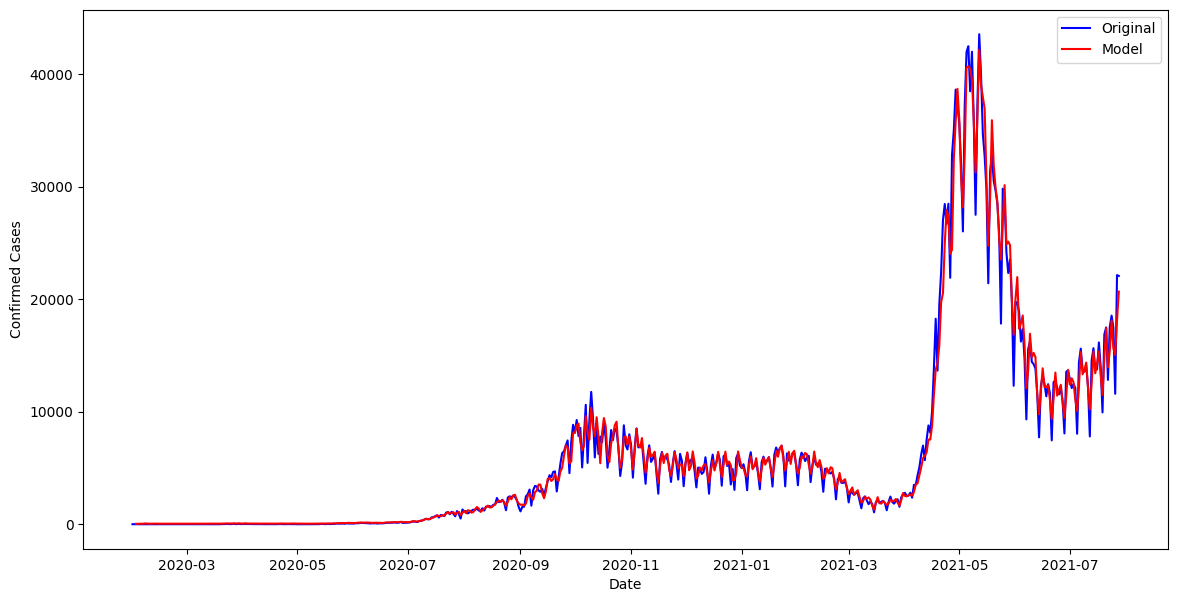

In [ ]:
# plotting fitted model
plt.plot(df, color='b', label='Original')
plt.plot(model_values, color='r', label='Model')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='best')
plt.show(block=False)

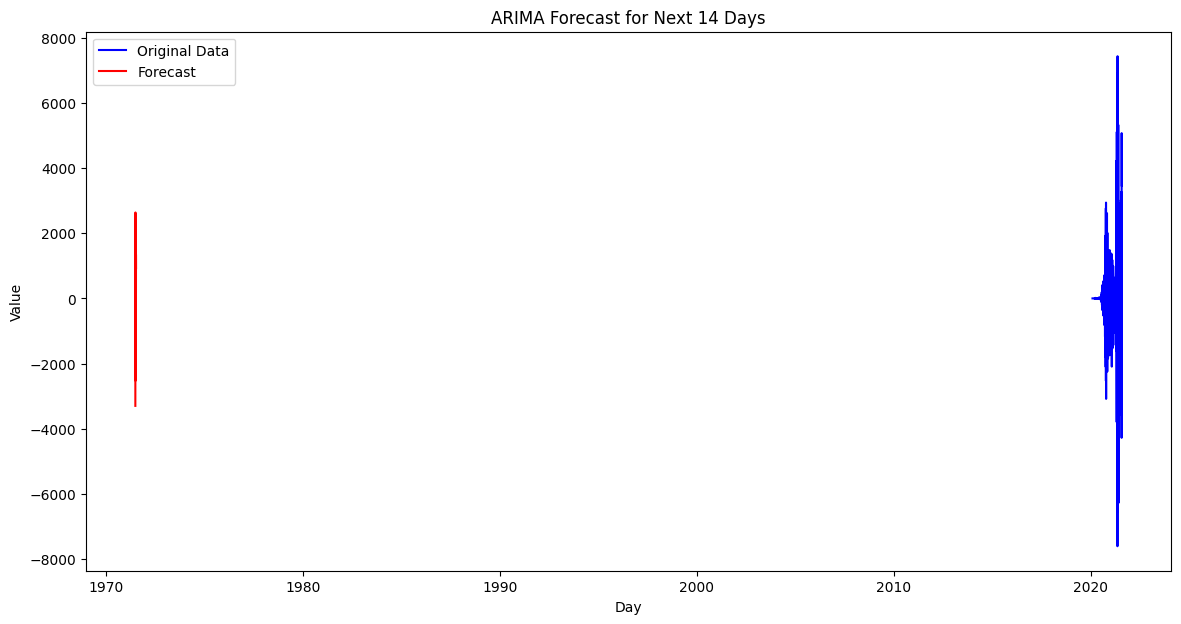

In [ ]:
# Predict the next 14 days
forecast_values = results_ARIMA.forecast(steps=14)

# Plot the original data
plt.plot(df_minus_movingAverage, color='b', label='Original Data')

# Plot the forecasted values
plt.plot(range(len(df_minus_movingAverage), len(df_minus_movingAverage) + 14), forecast_values, color='r', label='Forecast')

plt.title('ARIMA Forecast for Next 14 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.show()



In [ ]:
# forecast values for next 2 weeks
fc=results_ARIMA.forecast(steps=14)
forecast = fc[0]
forecast


-3295.54636042596

In [ ]:
import pandas as pd

# Create a new DataFrame with the last 3 rows from the original DataFrame
new_df = df.tail(3)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Confirmed': forecast_values})

# Concatenate the new DataFrame with the forecasted values to the original DataFrame
new_df = pd.concat([new_df, forecast_df])

# Printing the first five rows of the new DataFrame
print(new_df.head())


               Confirmed
2021-07-26  11586.000000
2021-07-27  22129.000000
2021-07-28  22056.000000
2021-07-29  -3295.546360
2021-07-30    250.226786


In [ ]:
# date range from July 29 to August 11 (2 week)
date=pd.date_range('2021-07-29','2021-08-11')
date

DatetimeIndex(['2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
               '2021-08-10', '2021-08-11'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# forecast dataframe
forcast_df = pd.DataFrame({'Date':date,
                           'Confirmed':new_df['Confirmed'][3:]})

# set datatype to datetime format
forcast_df['Date']=pd.to_datetime(forcast_df['Date'], infer_datetime_format=True)

# set Date column as index
forcast_df = forcast_df.set_index('Date')

In [ ]:
# Predicted Covid-19 Confirmed Cases for next 2 weeks
forcast_df

,Confirmed
Date,
2021-07-29,-3295.546360
2021-07-30,250.226786
2021-07-31,2635.185630
2021-08-01,-2507.161648
2021-08-02,-2523.684086
2021-08-03,2571.736688
2021-08-04,1803.169695
2021-08-05,-1441.820755
2021-08-06,-60.005364


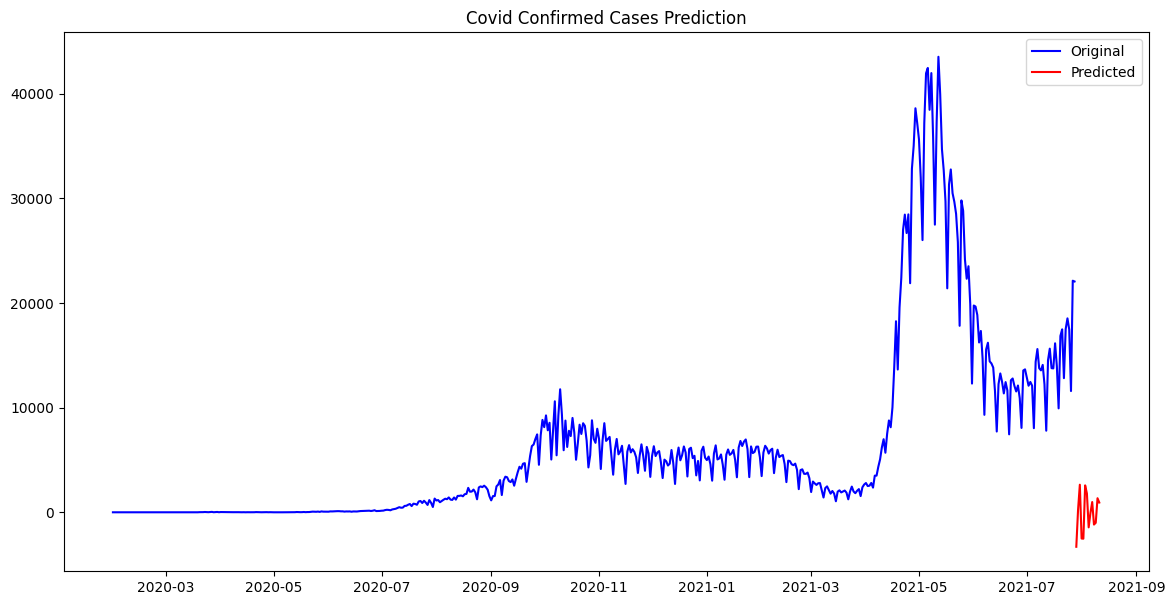

In [ ]:
# Prediction Plotting

orgi = plt.plot(df, color='b', label='Original')
predi = plt.plot(forcast_df, color='r', label='Predicted')
plt.legend(loc='best')
plt.title('Covid Confirmed Cases Prediction')
plt.show(block=False)